<a href="https://colab.research.google.com/github/socardonaa/Misiones_CursoIA/blob/main/MISION_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MISIÓN 1**

Sofia Cardona Arboleda


**- Seleccionar un problema e identificar un objetivo**


Una película comercial por lo general entretiene al público y genera grandes ingresos en taquillas para las compañías cinemaográficas. Hay diferentes factores que garantizan el éxito, por ejemplo, grandes directores y actores. Sin embargo, ha sucedido que películas con grandes actores y directores no han tenido el éxito esperado en cuanto a taquilla y calificación IMDB.

Basándonos en una base de datos con diferente información relacionada a películas queremos comprender los factores más importantes que determinan el éxito de una película. Por lo tanto, analizaremos qué genero de película es más exitoso, en pocas palabras cuáles tienen la calificación IMDB más alta.


```
IMDB_Score   Clasificación
1-3          Mala
3-6          Regular
6-8          Buena
8-10         Éxito
```



**- Cargar las librerías**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1) Cargar el dataset**

In [9]:
# Carga el dataset proporcionado sobre películas en un DataFrame de pandas.
dataset = pd.read_csv('/content/movie_metadata.csv')

**2) Revisión General de los Datos**

In [10]:
# Imprime las primeras 5 filas del dataset.
dataset.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0$,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0$,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0$,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0$,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,0.0$,NaN,12.0,7.1,NaN,0


In [11]:
# Usa .info() y .describe() para entender mejor la estructura y las estadísticas básicas.
dataset.shape

(5043, 28)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [13]:
dataset.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,2016.000000,137000.000000,9.500000,16.000000,349000.000000


**3) Búsqueda y Eliminación de Duplicados**

In [14]:
# Verifica si hay filas duplicadas en el dataset utilizando el método .duplicated().
duplicados = dataset.duplicated().sum()
print(f'Duplicados encontrados:{duplicados}')

Duplicados encontrados:45


In [15]:
# Si se encuentran duplicados, elimínalos con .drop_duplicates() y verifica cuántos duplicados fueron eliminados.
dataset.drop_duplicates(inplace=True)
duplicados2 = dataset.duplicated().sum()
print(f'Duplicados eliminados. Filas restantes {dataset.shape[0]}')

Duplicados eliminados. Filas restantes 4998


**4) Identificación de Valores Nulos**

In [16]:
# Identifica qué columnas tienen valores nulos y cuántos valores nulos hay en cada columna.
valores_nulos = dataset.isnull().sum()
valores_nulos

,0
color,19
director_name,103
num_critic_for_reviews,49
duration,15
director_facebook_likes,103
actor_3_facebook_likes,23
actor_2_name,13
actor_1_facebook_likes,7
gross,874
genres,0


**5) Visualización de Variables**

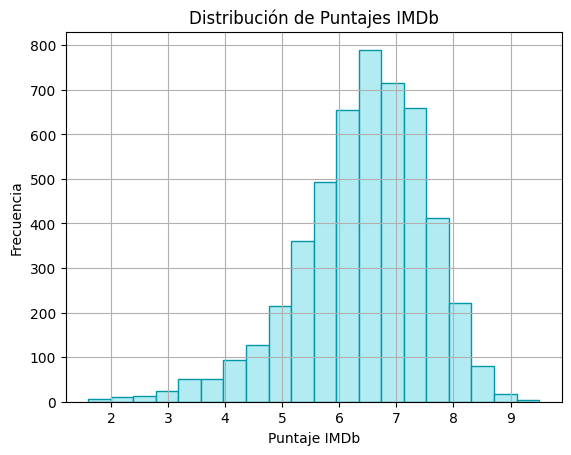

In [17]:
# Crea un histograma que muestre la distribución de la variable imdb_score.

plt.hist(dataset['imdb_score'], bins=20, edgecolor='#0097a7', color = '#b2ebf2')
plt.title('Distribución de Puntajes IMDb')
plt.xlabel('Puntaje IMDb')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


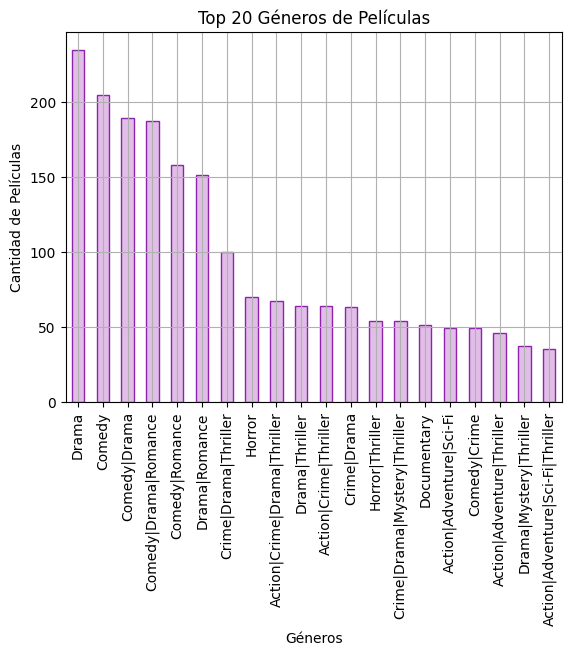

In [18]:
# Realiza un gráfico de barras para visualizar la cantidad de películas por género (genres).
dataset['genres'].value_counts().head(20).plot(kind='bar', edgecolor='#8e24aa', color = '#e1bee7')
plt.title('Top 20 Géneros de Películas')
plt.xlabel('Géneros')
plt.ylabel('Cantidad de Películas')
plt.grid(True)
plt.show()

**6) Análisis de Correlaciones**

In [19]:
# Revisar qué tipo de datos tienen las columnas budget, gross y imdb_score.
dataset[['budget', 'gross', 'imdb_score']].dtypes

,0
budget,object
gross,float64
imdb_score,float64


In [20]:
# Cambiar los tipos de datos de 'bugdet' de object a float
dataset['budget'] = dataset['budget'].str.replace('$', '').str.replace(',', '').astype(float)

In [21]:
# Calcula y muestra la correlación entre budget, gross y imdb_score.
correlacion = dataset[['budget', 'gross', 'imdb_score']].corr()
correlacion

,budget,gross,imdb_score
budget,1.000000,0.106943,0.026164
gross,0.106943,1.000000,0.198417
imdb_score,0.026164,0.198417,1.000000


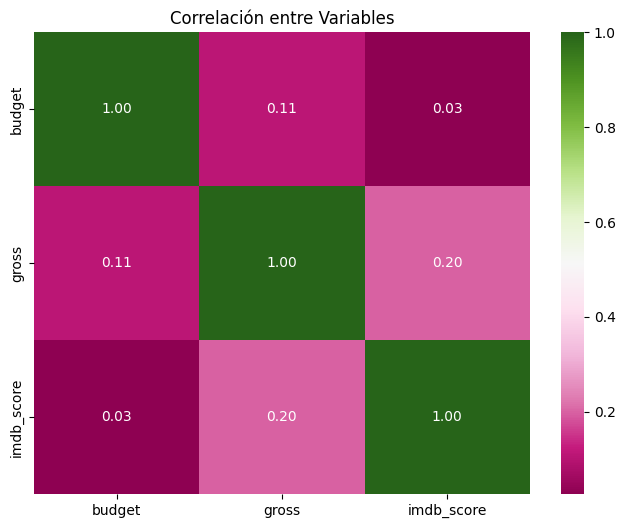

In [22]:
# Usa un mapa de calor para visualizar las correlaciones.
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='PiYG', fmt=".2f")
plt.title('Correlación entre Variables')
plt.show()

**7) Gráficos de Dispersión**

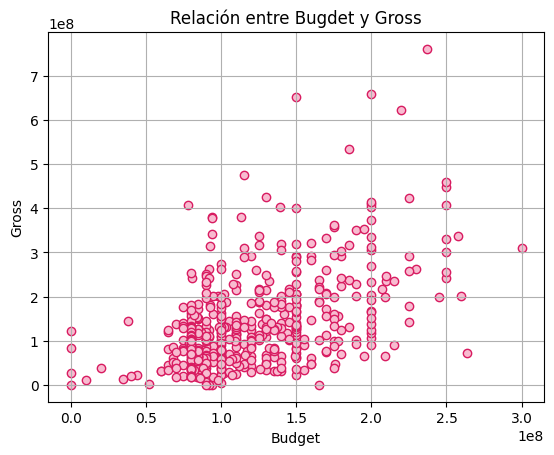

In [23]:
# Crea un gráfico de dispersión para analizar la relación entre budget y gross.
plt.scatter(dataset['budget'].head(500), dataset['gross'].head(500), color ='#f8bbd0', edgecolor = '#d81b60')
plt.title('Relación entre Bugdet y Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.grid(True)
plt.show()

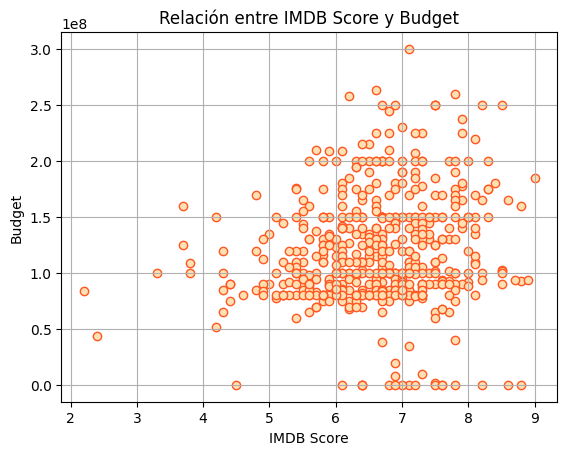

In [24]:
# Haz un gráfico de dispersión entre imdb_score y budget.
plt.scatter(dataset['imdb_score'].head(500), dataset['budget'].head(500), color ='#ffe0b2', edgecolor = '#ff5722')
plt.title('Relación entre IMDB Score y Budget')
plt.xlabel('IMDB Score')
plt.ylabel('Budget')
plt.grid(True)
plt.show()
#

In [25]:
# Borrar columnas innecesarias con muchos datos faltantes según el dataset.info()
dataset.drop(['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
              'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
              'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link','language',
              'country', 'content_rating'], axis=1, inplace=True)

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4998 entries, 0 to 5042
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_critic_for_reviews   4949 non-null   float64
 1   duration                 4983 non-null   float64
 2   director_facebook_likes  4895 non-null   float64
 3   actor_3_facebook_likes   4975 non-null   float64
 4   actor_1_facebook_likes   4991 non-null   float64
 5   gross                    4124 non-null   float64
 6   num_user_for_reviews     4977 non-null   float64
 7   budget                   4998 non-null   float64
 8   title_year               4891 non-null   float64
 9   actor_2_facebook_likes   4985 non-null   float64
 10  imdb_score               4998 non-null   float64
 11  aspect_ratio             4671 non-null   float64
 12  movie_facebook_likes     4998 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 546.7 KB


In [27]:
# Convertir datos de 'movie_facebook_likes' en float
dataset['movie_facebook_likes'] = dataset['movie_facebook_likes'].astype(float)

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4998 entries, 0 to 5042
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_critic_for_reviews   4949 non-null   float64
 1   duration                 4983 non-null   float64
 2   director_facebook_likes  4895 non-null   float64
 3   actor_3_facebook_likes   4975 non-null   float64
 4   actor_1_facebook_likes   4991 non-null   float64
 5   gross                    4124 non-null   float64
 6   num_user_for_reviews     4977 non-null   float64
 7   budget                   4998 non-null   float64
 8   title_year               4891 non-null   float64
 9   actor_2_facebook_likes   4985 non-null   float64
 10  imdb_score               4998 non-null   float64
 11  aspect_ratio             4671 non-null   float64
 12  movie_facebook_likes     4998 non-null   float64
dtypes: float64(13)
memory usage: 546.7 KB


In [29]:
# Eliminar filas completas con valores nulos
dataset.dropna(inplace=True)

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4005 entries, 0 to 5042
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_critic_for_reviews   4005 non-null   float64
 1   duration                 4005 non-null   float64
 2   director_facebook_likes  4005 non-null   float64
 3   actor_3_facebook_likes   4005 non-null   float64
 4   actor_1_facebook_likes   4005 non-null   float64
 5   gross                    4005 non-null   float64
 6   num_user_for_reviews     4005 non-null   float64
 7   budget                   4005 non-null   float64
 8   title_year               4005 non-null   float64
 9   actor_2_facebook_likes   4005 non-null   float64
 10  imdb_score               4005 non-null   float64
 11  aspect_ratio             4005 non-null   float64
 12  movie_facebook_likes     4005 non-null   float64
dtypes: float64(13)
memory usage: 438.0 KB


In [31]:
# Descargar archivo csv limpio
dataset.to_csv('movie_metadata_cleaned.csv', index=False)